In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pwd

'/content'

In [0]:
!cd /content/drive/

In [0]:
import os
import pickle
from glob import glob

# import basic numerical libraries
import numpy as np
import pandas as pd

# import keras libraries for image recognition
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image as kimage
from sklearn.metrics.pairwise import pairwise_distances
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import cv2
from IPython.display import Image
import re

Using TensorFlow backend.


In [0]:

!unzip drive/My\ Drive/images.zip

Archive:  drive/My Drive/images.zip
   creating: images/
  inflating: images/9733.jpg         
   creating: __MACOSX/
   creating: __MACOSX/images/
  inflating: __MACOSX/images/._9733.jpg  
  inflating: images/14147.jpg        
  inflating: __MACOSX/images/._14147.jpg  
  inflating: images/52112.jpg        
  inflating: __MACOSX/images/._52112.jpg  
  inflating: images/6400.jpg         
  inflating: __MACOSX/images/._6400.jpg  
  inflating: images/34297.jpg        
  inflating: __MACOSX/images/._34297.jpg  
  inflating: images/24084.jpg        
  inflating: __MACOSX/images/._24084.jpg  
  inflating: images/12536.jpg        
  inflating: __MACOSX/images/._12536.jpg  
  inflating: images/54563.jpg        
  inflating: __MACOSX/images/._54563.jpg  
  inflating: images/15259.jpg        
  inflating: __MACOSX/images/._15259.jpg  
  inflating: images/35189.jpg        
  inflating: __MACOSX/images/._35189.jpg  
  inflating: images/44770.jpg        
  inflating: __MACOSX/images/._44770.jpg  
 

In [0]:
image_df = pd.DataFrame()
image_df['images'] = glob('images/*.jpg')
image_df.head()
image_df.shape

(44441, 1)

In [0]:
# Train on the VGG Model
model = VGG16(include_top=False, weights='imagenet')





58892288/58889256 [==============================] - 1s 0us/step








In [0]:
# Create a dictionary of shirts for feeding to the image recognition model
def get_embeddings(model,image):
    img = kimage.load_img(image, target_size=(224, 224))   # VGG accepts images in 224 X 224 pixels
    img = preprocess_input(np.expand_dims(kimage.img_to_array(img), axis=0))  # so some preprocessing
    id = re.findall(r'\d+', image)
    id = int(id[0])
    return model.predict(img).ravel()

In [0]:
trim_image_df = image_df.head(10000)

In [0]:
trim_image_df['embeddings'] = trim_image_df.apply(lambda x: get_embeddings(model,x.images),axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
trim_image_df.head()

images                                         embeddings
0  images/26706.jpg  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1  images/58264.jpg  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2  images/40526.jpg  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3  images/27865.jpg  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4   images/7805.jpg  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

In [0]:
df_embs = trim_image_df['embeddings'].apply(pd.Series)
df_embs

0      1      2      3      4      ...  25083  25084  25085  25086  25087
0       0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
1       0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
2       0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
3       0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
4       0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
...     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
9995    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
9996    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
9997    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
9998    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
9999    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0

[10000 rows x 25088 columns]

In [0]:
from sklearn.metrics.pairwise import pairwise_distances

# Calcule DIstance Matriz
cosine_sim = 1-pairwise_distances(df_embs, metric='cosine')
cosine_sim[:4, :4]

array([[0.9999992 , 0.16583645, 0.11937827, 0.10361505],
       [0.16583645, 1.        , 0.13704216, 0.19224662],
       [0.11937827, 0.13704216, 1.        , 0.14702791],
       [0.10361505, 0.19224662, 0.14702791, 1.        ]], dtype=float32)

In [0]:
indices = pd.Series(range(len(trim_image_df)), index=trim_image_df.index)

# Function that get movie recommendations based on the cosine similarity score of movie genres
def get_recommender(idx, df, top_n = 5):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return indices.iloc[idx_rec].index, idx_sim



In [0]:
get_recommender(2993, trim_image_df, top_n = 5)

(Int64Index([4740, 7716, 3372, 5923, 5295], dtype='int64'),
 [0.6564238, 0.6013864, 0.5939342, 0.5939342, 0.57706004])

In [0]:
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg

In [0]:
import cv2
from IPython.display import Image


In [0]:
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional
    
def img_path(img):
    return img

def load_image(img, resized_fac = 0.1):
    img     = cv2.imread(img_path(img))
    w, h, _ = img.shape
    resized = cv2.resize(img, (int(h*resized_fac), int(w*resized_fac)), interpolation = cv2.INTER_AREA)
    return resized

In [0]:
image_df['embeddings'] = image_df.apply(lambda x: get_embeddings(model,x.images),axis=1)

In [0]:
image_df.to_pickle("image_df.pkl")
image_df.head()

NameError: ignored

In [0]:
df_embbedings = image_df['embeddings'].apply(pd.Series)
df_embbedings.head()

In [0]:

# Calcule DIstance Matriz
cosine_similarity = 1-pairwise_distances(df_embbedings, metric='cosine')
cosine_similarity[:4, :4]

In [0]:
indices = pd.Series(range(len(image_df)), index=image_df.index)

# Function that get movie recommendations based on the cosine similarity score of movie genres
def get_recommender(idx, df, top_n = 5):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_similarity[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return indices.iloc[idx_rec].index, idx_sim


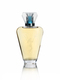

Recommendations:   


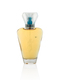

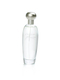

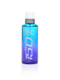

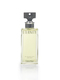

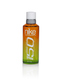

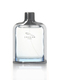

In [0]:
# Idx Item to Recommender
idx_ref = 2022

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, image_df, top_n = 6)

# Plot
#===================
#print(trim_image_df.iloc[idx_ref].images)
display(Image(image_df.iloc[idx_ref].images))

# generation of a dictionary of (title, images)
#figures = {'im'+str(i): load_image(row.images) for i, row in image_df.loc[idx_rec].iterrows()}
figures = [row for row in image_df.loc[idx_rec].images]
# plot of the images in a figure, with 2 rows and 3 columns
#plot_figures(figures, 2, 3)
print("Recommendations:   ")
for i in figures:
  display(Image(i))